In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pytesseract

In [2]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [3]:
# function to fetch all the file names from the data folder

def get_filenames_in_directory(directory):
    filenames = []
    try:
        # List all files in the directory
        filenames = os.listdir(directory)
    except OSError as e:
        print(f"Error: {e}")
    
    return filenames

In [4]:
# Fetch all the .jpg filenames from the directory

# Specify the directory path
directory_path = os.getcwd()

# Get the filenames in the directory
filenames = get_filenames_in_directory(directory_path)

image_files = []

# Print the filenames
for filename in filenames:
    if '.jpg' in filename:
        image_files.append(filename)
    else:
        continue
print(image_files)

['Crop_IMG_20240508_164440.jpg', 'IMG_20240508_164440.jpg', 'IMG_20240508_164451.jpg', 'IMG_20240508_164505.jpg', 'IMG_20240508_164513.jpg', 'IMG_20240508_164523.jpg', 'IMG_20240508_164529.jpg']


In [6]:
image = cv2.imread(imageFile)
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(742, 210, 3)


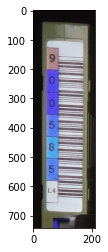

In [7]:
plt.imshow(image)

In [8]:
# Invert the color of the image to the real format

new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

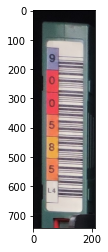

In [9]:
plt.imshow(new_image)

In [49]:
# Function to extract numerical codes
def extract_numerical_codes(image_path):
    # Load the image
    image = image_path
    
    cv2.imshow('Original image',image)
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Convert the image to binary
    _, binary_img = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    
    cv2.imshow('Binary image',binary_img)
    
    # Define parameters for text detection
    config = '--oem 3 --psm 5'
    
    # Divide the shelf into small boxes 
    box_width = 200
    box_height = 1050
    
    # Extract text from each box
    numerical_codes = []
    for y in range(0, image.shape[0], box_height):
        for x in range(0, image.shape[1], box_width):
            box = gray_image[y:y+box_height, x:x+box_width]
            
            # Draw a rectangle around the box
            cv2.rectangle(gray_image, (x, y), (x+box_width, y+box_height), (0, 255, 0), 2)
            
            
            # Apply text extraction algorithm (Tesseract OCR)
            text = pytesseract.image_to_string(box, config=config)
            
            # Filter out non-numeric characters
            numerical_code = ''.join(filter(str.isdigit, text))
            
            # Add numerical code to the list if it's not empty
            if numerical_code:
                numerical_codes.append(numerical_code)
    
    # show the image with boxes
    cv2.imshow('Images with Boxes', gray_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    return numerical_codes

In [50]:
image_path = new_image
numerical_codes = extract_numerical_codes(image_path)
print("Numerical Codes:", numerical_codes)

Numerical Codes: []


In [15]:
def cross_check_with_names(text_lines, names_file):
    
    # Read the names from the names file
    nameFile = open(names_file, 'r')
    
    names = nameFile.readlines()

    # Strip newline characters from names
    names = [name.strip() for name in names]
    
    # Initialize a list to store matched names
    matched_names = []
    
    # Initialize a list to store unmatched names
    unmatched_names = []
    
    # Iterate through each line of text extracted from the image
    for line in text_lines:
        # Check if any name from the names file is present in the extracted line
        for name in names:
            if name.lower() in line.lower():
                matched_names.append(name)
            else:
                unmatched_names.append(name)
    
    return matched_names, unmatched_names

In [19]:
# Provide the path to your names file
names_file = 'ID_codes.txt' 

# Call the function to extract text from the image
text_lines = extract_numerical_codes(image_path)

# Call the function to cross-check with names
matched_names, unmatched_names = cross_check_with_names(text_lines, names_file)

with open('matched_names.txt', 'w') as matched_names_File:
    for name in matched_names:
        matched_names_File.write(name +',' + '\n')
        
with open('unmatched_names.txt', 'w') as unmatched_names_File:
    for name in unmatched_names:
        unmatched_names_File.write(name +',' + '\n')

ValueError: not enough values to unpack (expected 2, got 0)